## 1\. Análise de Inadimplência - CreditCassio

A empresa CreditCassio está desconfiando que está passando por um aumento no índice de inadimplência, porém o diretor da empresa não sabe o que está causando e quais fatores podem estar contribuindo para este problema. Com a base de dados disponibilizada, iremos avaliar quais fatores potenciais podem estar relacionados a esta inadimplência.

## 2\. Importando os pacotes necessários no projeto


In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

## 3\. Exploração de Dados

Os dados estão no formato CSV e contém informações sobre clientes da  instituição financeira fictícia CassioTech. Estamos interessados em explicar a segunda coluna, chamada de **default**, que indica se um cliente é adimplente(`default = 0`), ou inadimplente (`default = 1`), ou seja, queremos entender o porquê um cliente deixa de honrar com suas dívidas baseado no comportamento de outros atributos, como salário, escolaridade e movimentação financeira. Uma descrição completa dos atributos está abaixo.



| Coluna  | Descrição |
| ------- | --------- |
| id      | Número da conta |
| default | Indica se o cliente é adimplente (0) ou inadimplente (1) |
| idade   | --- |
| sexo    | --- |
| depedentes | --- |
| escolaridade | --- |
| estado_civil | --- |
| salario_anual | Faixa do salario mensal multiplicado por 12 |
| tipo_cartao | Categoria do cartao: blue, silver, gold e platinium |
| meses_de_relacionamento | Quantidade de meses desde a abertura da conta |
| qtd_produtos | Quantidade de produtos contratados |
| iteracoes_12m | Quantidade de iteracoes com o cliente no último ano |
| meses_inatico_12m | Quantidade de meses que o cliente ficou inativo no último ano |
| limite_credito | Valor do limite do cartão de crédito |
| valor_transacoes_12m | Soma total do valor das transações no cartão de crédito no último ano |
| qtd_transacoes_12m | Quantidade total de transações no cartão de crédito no último ano |



In [2]:
df = pd.read_csv('base_creditcassio.csv', na_values='na')

In [3]:
df.head(n=5)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


### **3.1. Estrutura** 

In [4]:
df.shape 

(10127, 16)

In [5]:
df[df['default'] == 0].shape 

(8500, 16)

In [6]:
df[df['default'] == 1].shape 

(1627, 16)

In [7]:
qtd_total, _ = df.shape
qtd_adimplentes, _  = df[df['default'] == 0].shape
qtd_inadimplentes, _ = df[df['default'] == 1].shape

In [8]:
print(qtd_total)
print(qtd_adimplentes)
print(qtd_inadimplentes)

10127
8500
1627


In [9]:
print(f'A proporção de clientes adimplentes é de {round(100 * qtd_adimplentes / qtd_total, 2)} %')
print(f'A proporção de clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)} %')

A proporção de clientes adimplentes é de 83.93 %
A proporção de clientes inadimplentes é de 16.07 %


### **3.2. Schema** 

In [10]:
df.head(n=5)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


 - Colunas e seus respectivos tipos de dados.

In [11]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

 - Atributos **categóricos**.

In [12]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


 - Atributos **numéricos**.

In [13]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


### **3.3. Dados faltantes** 

In [14]:
df.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


Podemos verificar quais colunas possuem dados faltantes.

In [15]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

 - A função abaixo levanta algumas estatisticas sobre as colunas dos dados faltantes.
 - Ela traz a quantidade de dados faltantes por coluna;
 - Traz o percentual relativo ao total de linhas daquela coluna (Quantos % dessa coluna está nulo?)

In [16]:
def stats_dados_faltantes(df: pd.DataFrame) -> None:

    stats_dados_faltantes = []
    for col in df.columns:
        if df[col].isna().any():
            qtd, _ = df[df[col].isna()].shape
            total, _ = df.shape
            dict_dados_faltantes = {col: {'quantidade': qtd, "porcentagem": round(100 * qtd/total, 2)}}
            stats_dados_faltantes.append(dict_dados_faltantes)

    for stat in stats_dados_faltantes:
        print(stat)

In [17]:
stats_dados_faltantes(df=df)

{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


In [18]:
stats_dados_faltantes(df=df[df['default']== 0]) #filtrando pra considerar só as linhas que o default é igual a 0 (ou seja, adimplente)

{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


In [19]:
stats_dados_faltantes(df=df[df['default']== 1]) #filtrando pra considerar só as linhas que o default é igual a 0 (ou seja, inadimplente)

{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


## 4\. Transformação e limpeza de dados

### **4.1. Correção de schema** 

Na etapa de exploração, notamos que as colunas **limite_credito** e **valor_transacoes_12m** estavam sendo interpretadas como colunas categóricas (`dtype = object`).

In [20]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [21]:
df[['limite_credito', 'valor_transacoes_12m']].head(n=5)

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


Testando a função `lambda` que vai replicar a formatação do decimal no padrão do Python

In [22]:
fn = lambda valor: float(valor.replace(".", "").replace(",", "."))
valores_originais = ['12.691,51', '8.256,96', '3.418,56', '3.313.03', '4.716,22']
valores_limpos = list(map(fn, valores_originais))

print(valores_originais)
print(valores_limpos)

['12.691,51', '8.256,96', '3.418,56', '3.313.03', '4.716,22']
[12691.51, 8256.96, 3418.56, 331303.0, 4716.22]


Com a função `lambda` de limpeza pronta, vamos aplicar nas colunas 'valor_transacoes_12m' e 'limite_credito'

In [23]:
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(lambda valor: float(valor.replace(".", "").replace(",", ".")))
df['limite_credito'] = df['limite_credito'].apply(lambda valor: float(valor.replace(".", "").replace(",", ".")))

Vamos descrever novamente o *schema*:

In [24]:
df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

 - Atributos **categóricos**.

In [25]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436


 - Atributos **numéricos**.

In [26]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


### **4.2. Remoção de dados faltantes** 

In [27]:
df.dropna(inplace = True)

In [28]:
df.shape

(7081, 16)

In [29]:
df[df['default']== 0].shape

(5968, 16)

In [30]:
df[df['default']== 1].shape

(1113, 16)

In [31]:
qtd_total_novo, _ = df.shape
qtd_adimplentes_novo, _ = df[df['default'] == 0].shape
qtd_inadimplentes_novo, _ = df[df['default'] == 1].shape

In [32]:
print(f'A proporção de clientes adimplentes é de {round(100 * qtd_adimplentes / qtd_total, 2)}%')
print(f'A nova proporção de clientes adimplentes é de {round(100 * qtd_adimplentes_novo / qtd_total_novo, 2)}%')
print("")
print(f'A proporção de clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%')
print(f'A nova proporção clientes inadimplentes é de {round(100 * qtd_inadimplentes_novo / qtd_total_novo, 2)}%')

A proporção de clientes adimplentes é de 83.93%
A nova proporção de clientes adimplentes é de 84.28%

A proporção de clientes inadimplentes é de 16.07%
A nova proporção clientes inadimplentes é de 15.72%


## 5\. Visualização de dados

Os dados estão prontos, vamos criar diversas visualizações para correlacionar variáveis explicativas com a variável resposta para buscar entender qual fator leva um cliente a inadimplencia. E para isso, vamos sempre comparar a base com todos os clientes com a base de adimplentes e inadimplentes.

In [33]:
df_adimplente = df[df['default'] == 0]

In [34]:
df_inadimplente = df[df['default'] == 1]

### **5.1. Visualizações categóricas** 

Nesta seção, vamos visualizar a relação entre a variável resposta **default** com os atributos categóricos.

In [35]:
df.select_dtypes('object').head(5)

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue
4,M,sem educacao formal,casado,$60K - $80K,blue
5,M,mestrado,casado,$40K - $60K,blue


 - Escolaridade

Este fator não impacta na inadimplencia dos clientes

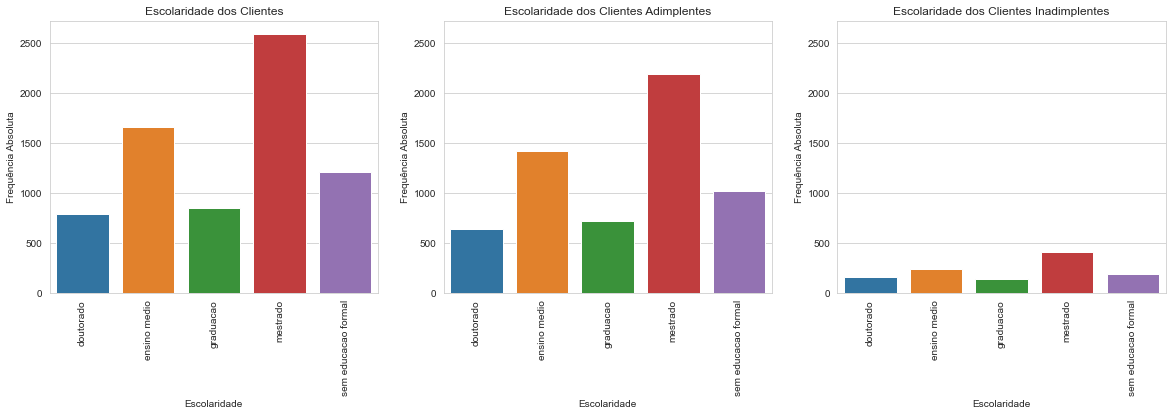

In [44]:
coluna = 'escolaridade'
titulos = ['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes']
eixo = 0
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1 
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True) 

for dataframe in [df, df_adimplente, df_inadimplente]:
    df_to_plot = dataframe[coluna].value_counts().to_frame() 
    df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
    df_to_plot[coluna] = df_to_plot.index
    df_to_plot.sort_values(by=[coluna], inplace=True)
    df_to_plot.sort_values(by=[coluna])

    f = sns.barplot(x=df_to_plot[coluna],y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
    f.set(title=titulos[eixo],xlabel=coluna.capitalize(),ylabel='Frequência Absoluta')
    f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
    
    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))
    eixo += 1



 - Salário Anual

Este fator não impacta na inadimplencia dos clientes

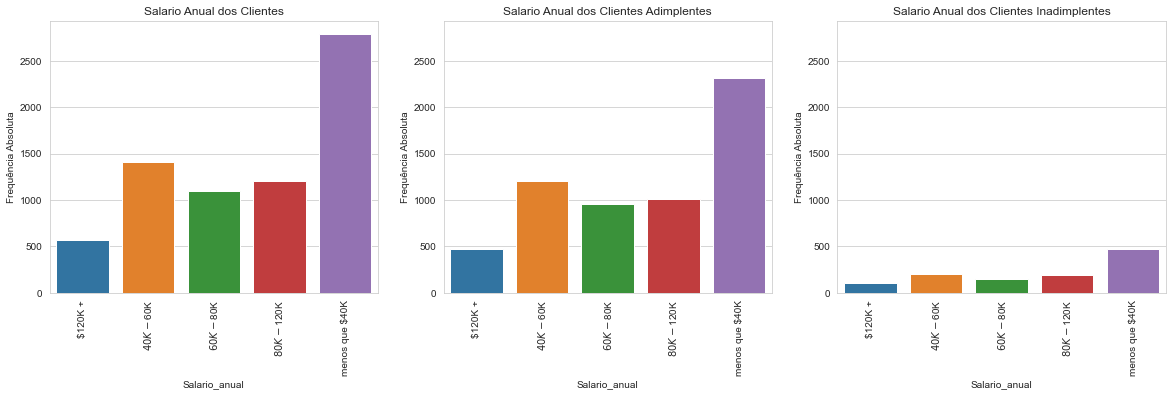

In [45]:
coluna = 'salario_anual'
titulos = ['Salario Anual dos Clientes', 'Salario Anual dos Clientes Adimplentes', 'Salario Anual dos Clientes Inadimplentes']
eixo = 0
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1 
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True) 

for dataframe in [df, df_adimplente, df_inadimplente]:
    df_to_plot = dataframe[coluna].value_counts().to_frame()
    df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
    df_to_plot[coluna] = df_to_plot.index
    df_to_plot.sort_values(by=[coluna], inplace=True)
    df_to_plot.sort_values(by=[coluna])

    f = sns.barplot(x=df_to_plot[coluna],y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
    f.set(title=titulos[eixo],xlabel=coluna.capitalize(),ylabel='Frequência Absoluta')
    f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
    
    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))
    eixo += 1



- Estado Civil

Podemos perceber que há uma proporção maior de solteiros inadimplentes do que adimplentes. Este fator é importante na inadimplencia

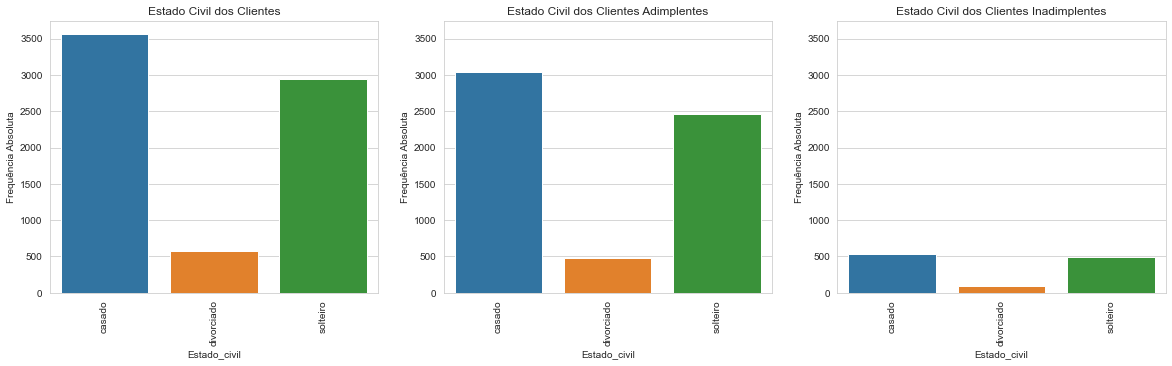

In [46]:
coluna = 'estado_civil'
titulos = ['Estado Civil dos Clientes', 'Estado Civil dos Clientes Adimplentes', 'Estado Civil dos Clientes Inadimplentes']
eixo = 0
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1 
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True) 

for dataframe in [df, df_adimplente, df_inadimplente]:
    df_to_plot = dataframe[coluna].value_counts().to_frame() 
    df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
    df_to_plot[coluna] = df_to_plot.index
    df_to_plot.sort_values(by=[coluna], inplace=True)
    df_to_plot.sort_values(by=[coluna])

    f = sns.barplot(x=df_to_plot[coluna],y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
    f.set(title=titulos[eixo],xlabel=coluna.capitalize(),ylabel='Frequência Absoluta')
    f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
    
    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))
    eixo += 1



- Tipo do Cartão do Cliente

Este fator não impacta na inadimplência dos clientes

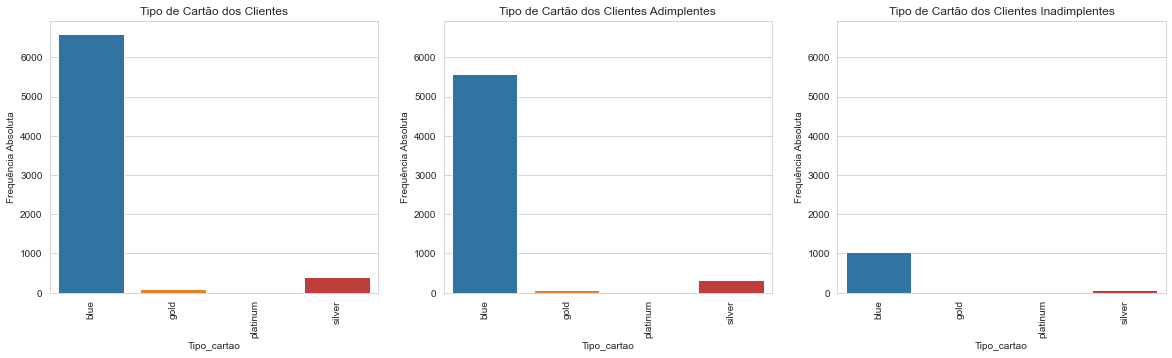

In [47]:
coluna = 'tipo_cartao'
titulos = ['Tipo de Cartão dos Clientes', 'Tipo de Cartão dos Clientes Adimplentes', 'Tipo de Cartão dos Clientes Inadimplentes']
eixo = 0
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1 # neste trecho definimos que o valor maximo do eixo Y é a frequencia da coluna 'salario_anual', no caso 2500
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True) # o espaço do grafico é de 1 linha contendo 3 colunas (graficos), cada um c/ tamanho 20 por 5

for dataframe in [df, df_adimplente, df_inadimplente]:
    df_to_plot = dataframe[coluna].value_counts().to_frame() #aqui ele vai pegar qts registros com doutorado, mestrado, ensino medio, etc. To Frame transforma td em dataframe
    df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
    df_to_plot[coluna] = df_to_plot.index
    df_to_plot.sort_values(by=[coluna], inplace=True)
    df_to_plot.sort_values(by=[coluna])

    f = sns.barplot(x=df_to_plot[coluna],y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
    f.set(title=titulos[eixo],xlabel=coluna.capitalize(),ylabel='Frequência Absoluta')
    f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
    
    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))
    eixo += 1



### **5.2. Visualizações numéricas** 

Nesta seção, vamos visualizar a relação entre a variável resposta **default** com os atributos numéricos.

In [40]:
df.drop(['id', 'default'], axis=1).select_dtypes('number').head(n=5)

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,3,39,5,3,1,12691.51,1144.90,42
1,49,5,44,6,2,1,8256.96,1291.45,33
2,51,3,36,4,0,1,3418.56,1887.72,20
4,40,3,21,5,0,1,4716.22,816.08,28
5,44,2,36,3,2,1,4010.69,1088.07,24


 - Quantidade de Transações nos Últimos 12 Meses

Em geral, clientes que fazem entre 20 a 60 transações por ano podem ficar inadimplentes

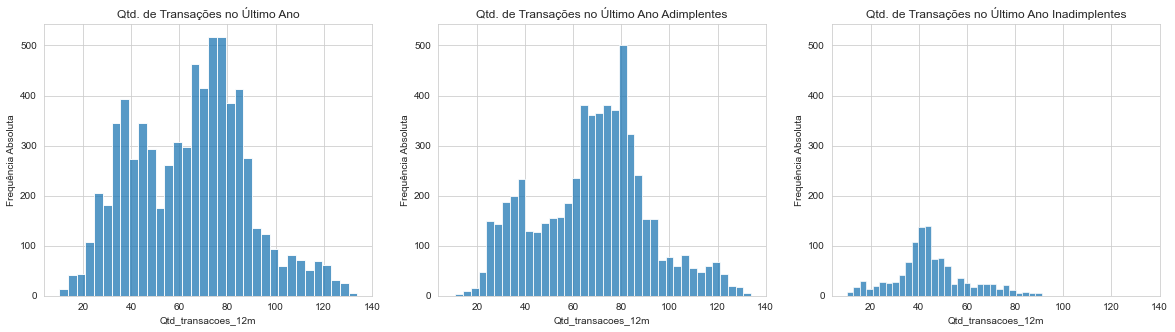

In [48]:
coluna = 'qtd_transacoes_12m'
titulos = ['Qtd. de Transações no Último Ano', 'Qtd. de Transações no Último Ano Adimplentes', 'Qtd. de Transações no Último Ano Inadimplentes']
eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True) 

for dataframe in [df, df_adimplente, df_inadimplente]:
    
    f = sns.histplot(x=coluna, data = dataframe, stat='count', ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

    eixo += 1



 - Valor das Transações nos Últimos 12 Meses

Clientes inadimplentes estão normalmente transacionando entre R$ 1000 a R$ 2500 por ano

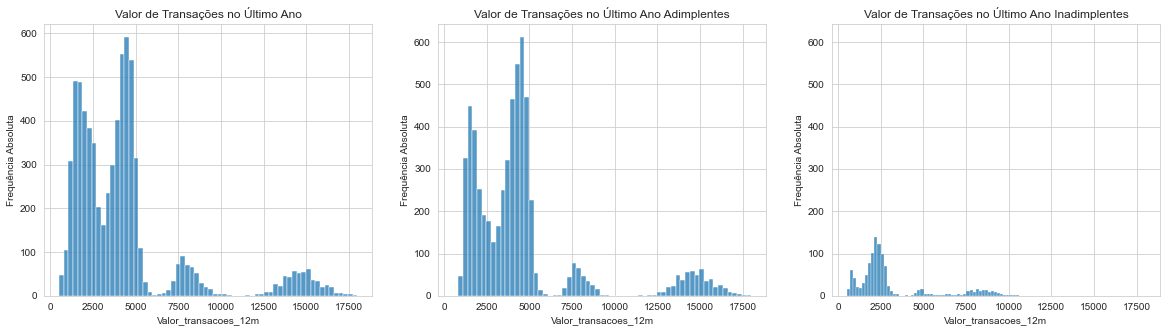

In [49]:
coluna = 'valor_transacoes_12m'
titulos = ['Valor de Transações no Último Ano', 'Valor de Transações no Último Ano Adimplentes', 'Valor de Transações no Último Ano Inadimplentes']
eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True) 

for dataframe in [df, df_adimplente, df_inadimplente]:
    
    f = sns.histplot(x=coluna, data = dataframe, stat='count', ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

    eixo += 1



 - Valor de Transações nos Últimos 12 Meses x Quantidade de Transações nos Últimos 12 Meses

Os inadimplentes estão concentrados em clientes que normalmente transacionam entre 20 a 60 vezes entre o valor de 1000 a 2500 reais e os que transacionam entre 60 e 80 vezes ao ano no valor entre 7500 e 1000 reais

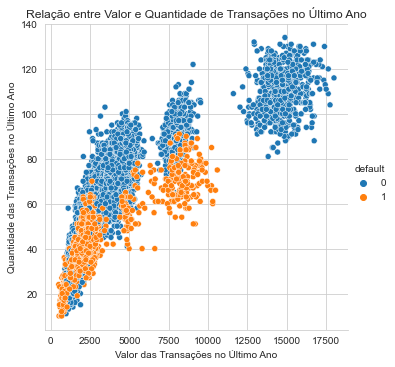

In [43]:
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')
_ = f.set(
 title='Relação entre Valor e Quantidade de Transações no Último Ano',
 xlabel='Valor das Transações no Último Ano',
 ylabel='Quantidade das Transações no Último Ano'
)

## 6\. Storytelling

Com base na análise feita anteriormente, desde a exploração, limpeza e visualização de Dados, pudemos levantar as seguintes informações que podem ajudar o nosso Diretor na identificação/ação para atuar com clientes inadimplentes:

* Podemos perceber que há uma proporção maior de solteiros inadimplentes do que adimplentes.
* Em geral, clientes que fazem entre 20 a 60 transações por ano podem ficar inadimplentes.
* Clientes inadimplentes estão normalmente transacionando entre 1000,00 a 2500,00 reais por ano.
* Os inadimplentes estão concentrados em clientes que normalmente transacionam entre 20 a 60 vezes entre o valor de 1000,00 a 2500,00 reais e os que transacionam entre 60 e 80 vezes ao ano no valor entre 7500,00 e 1000,00 reais.